Boosting Practice Teach for Galvinize
====================

Outline:

  - Opening example.
  - Outline.
  - You Could Have Invented Gradient Boosting.
  - Practical Gradient Boosting.
  - AdaBoost.

Opening Example
--------------

Boosting is a stunningly powerful, general purpose, off-the-shelf machine learning algorithm.

Allstate ran three Kaggle competitions, the winners of all three used Gradient Boosting as thier core learning algorithm.

In [911]:
%matplotlib inline

import numpy as np
import numpy.random as rand
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import sklearn.datasets as datasets
import sklearn.cross_validation as cv
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = (8.0, 6.0)

from IPython.display import HTML

In [912]:
# Simple helper functions
to_column = lambda x: x.reshape((x.shape[0], 1))

## Boosting for regression.

In [913]:
N = 500
N_ESTIMATORS = 500

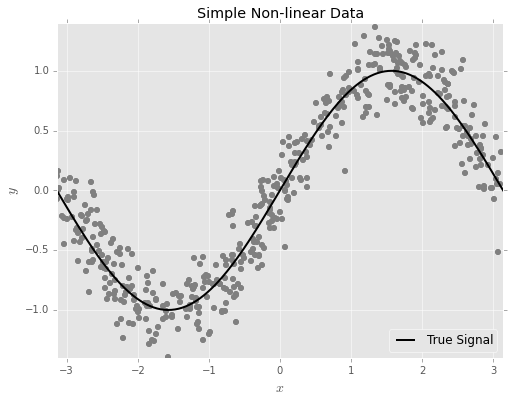

In [914]:
# Generate some data from a simple noiseless function
f = lambda x: np.sin(x)
x = np.linspace(-np.pi, np.pi, num=250)
y = f(x)

xs = rand.uniform(-np.pi, np.pi, N)
ys = f(xs) + rand.normal(0, 0.20, N)

def plot_truth():
    plt.plot(x, y, color = 'black', label="True Signal")
    plt.xlim([-np.pi, np.pi]); plt.ylim([-1.4, 1.4])
    
def plot_data():
    plt.plot(xs, ys, 'o', color='grey', markeredgewidth=0)
    
plot_data()
plot_truth()
plt.title('Simple Non-linear Data')
plt.xlabel('$x$', fontsize=14); plt.ylabel('$y$', fontsize=14)
plt.legend(loc="lower right")

plt.savefig('plots/sin-with-data.png', bbox_inches='tight')

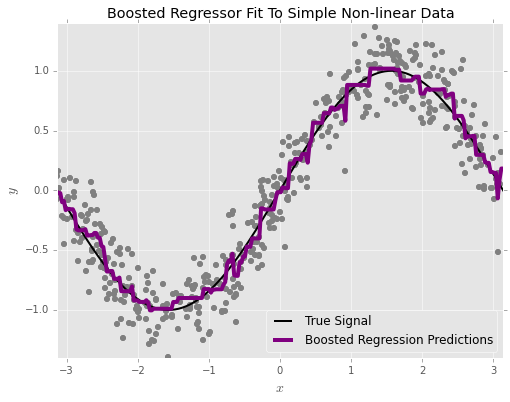

In [915]:
# Fit a gradient boosted regressor to this function and plot both the functiona and f

model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=N_ESTIMATORS, max_depth=3)
model.fit(to_column(xs), ys)

y_hat = model.predict(to_column(x))

plot_data()
plot_truth()
plt.plot(x, y_hat, color='purple', linewidth=4, label="Boosted Regression Predictions")

plt.title('Boosted Regressor Fit To Simple Non-linear Data')
plt.xlabel('$x$', fontsize=14); plt.ylabel('$y$', fontsize=14)
plt.legend(loc="lower right")

plt.savefig('plots/sin-with-data-and-booster.png', bbox_inches='tight')

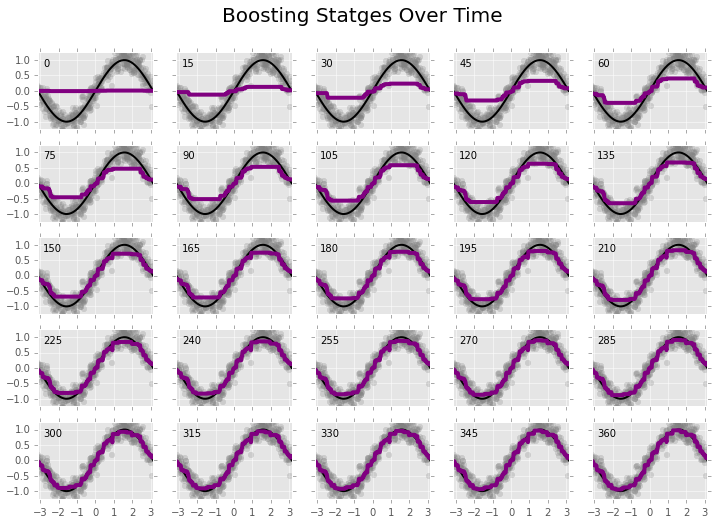

In [916]:
# Plot the partial sums of the weak learners to see what is going on.
# The point: the model learns gradually!

models = list(model.staged_predict(x.reshape(250, 1)))
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, 
                         figsize=(12.0, 8.0))

for i, ax in enumerate(axes.flatten()):
    ax.plot(xs, ys, 'o', color='grey', markeredgewidth=0, alpha=0.25)
    l1 = ax.plot(x, y, color = 'black')
    l2 = ax.plot(x, models[15*i], color="purple", linewidth=4)
    ax.text(-2.8, 0.8, str(15*i))
    
plt.xlim(-np.pi, np.pi); plt.ylim([-1.25, 1.25])    
plt.suptitle("Boosting Statges Over Time", fontsize=20)

plt.savefig('plots/boosting-over-time-multiple-plots.png', bbox_inches='tight')

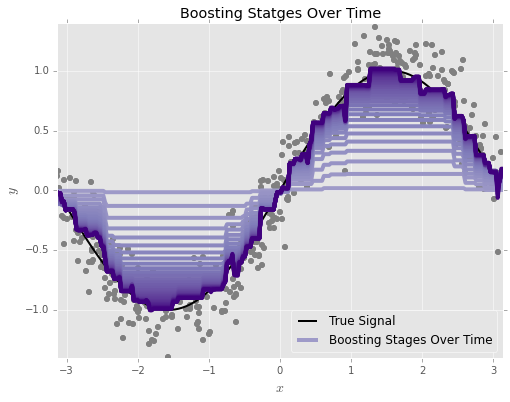

In [917]:
plot_data()
plot_truth()

label = "Boosting Stages Over Time"
for i, pred in enumerate(model.staged_predict(to_column(x))):
    if i % 15 == 1:
        plt.plot(x, pred, color=plt.cm.Purples(float(i) / 1000 + 0.5), linewidth=4,
                label=label)
        label = None
        
plt.legend(loc="lower right")
plt.xlabel('$x$', fontsize=14); plt.ylabel('$y$', fontsize=14)
plt.title("Boosting Statges Over Time")

plt.savefig('plots/boosting-over-time-single-plot.png', bbox_inches='tight')

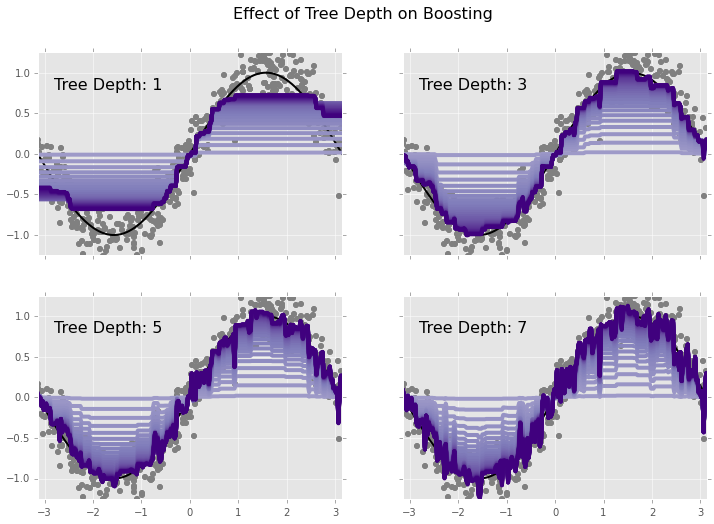

In [918]:
# Effect of changing tree depth
tree_depths = [1, 3, 5, 7]

models = [GradientBoostingRegressor(learning_rate=0.01, n_estimators=N_ESTIMATORS, max_depth=td) 
          for td in tree_depths]
for model in models:
    model.fit(to_column(xs), ys)
    
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, 
                         figsize=(12.0, 8.0))

for i, (depth, ax) in enumerate(zip(tree_depths, axes.flatten())):
    ax.plot(xs, ys, 'o', color='grey', markeredgewidth=0)
    ax.plot(x, y, color = 'black', label="True Signal")
    for j, pred in enumerate(models[i].staged_predict(to_column(x))):
        if j % 15 == 1:
            ax.plot(x, pred, color=plt.cm.Purples(float(j) / 1000 + 0.5), linewidth=4)
    ax.text(-2.8, 0.8, "Tree Depth: " + str(depth), fontsize=16)
    
plt.suptitle("Effect of Tree Depth on Boosting", fontsize=16)
plt.xlim(-np.pi, np.pi); plt.ylim([-1.25, 1.25])
plt.savefig('plots/sin-changing-depth.png', bbox_inches='tight')

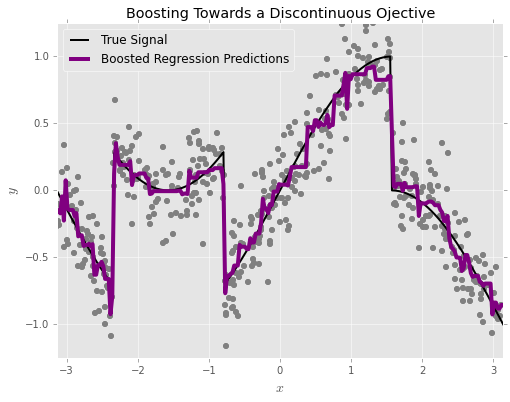

In [919]:
# Boosting can even handle complex, discontinuous loss functions

f_discontinuous = lambda x: f(x) + (x >= -0.75*np.pi)*(x <= -0.25*np.pi) - (x >= 0.5*np.pi)
y_discontinuous = f_discontinuous(x)
ys_discontinuous = f_discontinuous(xs) + rand.normal(0, 0.20, N)

def plot_discontinuous_truth():
    plt.plot(x, y_discontinuous, color = 'black', label="True Signal")
    plt.xlim(-np.pi, np.pi); plt.ylim([-1.25, 1.25])
    
def plot_discontinuous_data():
    plt.plot(xs, ys_discontinuous, 'o', color='grey', markeredgewidth=0)

model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)
model.fit(to_column(xs), ys_discontinuous)

y_hat = model.predict(to_column(x))

plot_discontinuous_data()
plot_discontinuous_truth()
plt.plot(x, y_hat, color='purple', linewidth=4, label="Boosted Regression Predictions")
plt.title("Boosting Towards a Discontinuous Ojective")
plt.xlabel('$x$', fontsize=14); plt.ylabel('$y$', fontsize=14)
plt.legend(loc="upper left")

plt.savefig('plots/broken-sin-with-booster.png', bbox_inches='tight')

## Boosting for Classification

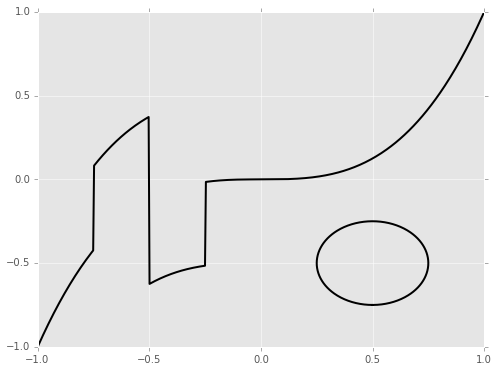

In [920]:
cubic_boundary = lambda t: (t, t**3 + 0.5*(t > -0.75)*(t < -0.5) - 0.5*(t > -0.5)*(t < -0.25))
circular_boundary = lambda t: (0.25*np.sin(t) + 0.5, 0.25*np.cos(t) - 0.5)

t_cubic = np.linspace(-1, 1, N)
x_cubic, y_cubic = cubic_boundary(t_cubic)
t_circle = np.linspace(-np.pi, np.pi, N)
x_circle, y_circle = circular_boundary(t_circle)

def plot_classification_boundary():
    plt.plot(x_cubic, y_cubic, color="black", label="True Decision Boundary")
    plt.plot(x_circle, y_circle, color="black")
    plt.xlim([-1, 1]); plt.ylim([-1, 1])
    
plot_classification_boundary()    

In [921]:
N = 1000
N_ESTIMATORS = 1000

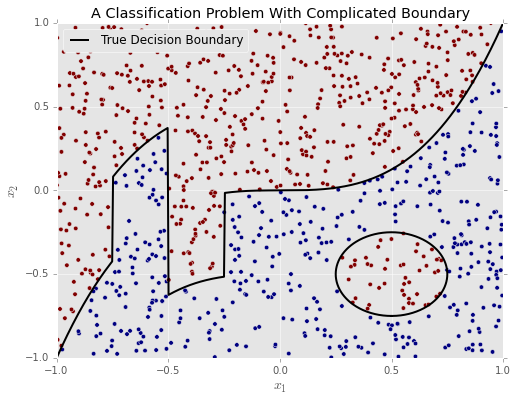

In [922]:
is_above_cubic = lambda x, y: cubic_boundary(x)[1] < y
is_inside_circle = lambda x, y: (x - 0.5)**2 + (y + 0.5)**2 < 0.25**2
is_positive_class = lambda x, y: np.logical_or(is_above_cubic(x, y), is_inside_circle(x, y))

xs = rand.uniform(-1, 1, N)
ys = rand.uniform(-1, 1, N)
label = is_positive_class(xs, ys)

def plot_data():
    plt.scatter(xs, ys, c=label, marker='o')

plot_data()
plot_classification_boundary()
plt.xlabel('$x_1$', fontsize=14); plt.ylabel('$x_2$', fontsize=14)
plt.title("A Classification Problem With Complicated Boundary")
plt.legend(loc="upper left")

plt.savefig('plots/classification-boundary-with-data.png', bbox_inches='tight')

In [923]:
X = np.vstack([xs, ys]).T

model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=N_ESTIMATORS, min_samples_leaf=10)
model.fit(X, label)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

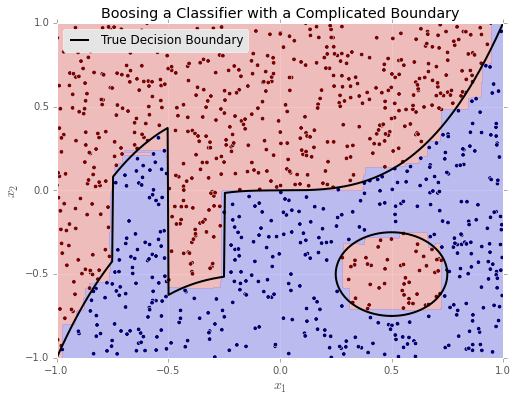

In [924]:
gx = np.linspace(-1, 1, 200)
gy = np.linspace(-1, 1, 200)
meshx, meshy = np.meshgrid(gx, gy)
grid = np.vstack([meshx.flatten(), meshy.flatten()]).T

p_hat = model.predict_proba(grid)[:, 0].flatten()
plt.contourf(meshx, meshy, p_hat.reshape(meshx.shape), 
             levels=np.linspace(0, 1, 3), 
             alpha=0.4, cmap=plt.cm.bwr_r,
             label="Fit Decision Boundary")
plot_data()
plot_classification_boundary()
plt.xlabel('$x_1$', fontsize=14); plt.ylabel('$x_2$', fontsize=14)
plt.title("Boosing a Classifier with a Complicated Boundary")
plt.legend(loc="upper left")

plt.savefig('plots/classification-boundary-with-booster.png', bbox_inches='tight')

# Boston Data Set

In [925]:
## Regression on the boston data set
N_ESTIMATORS = 3000

boston = datasets.load_boston()
X, y, names = boston['data'], boston['target'], boston['feature_names']

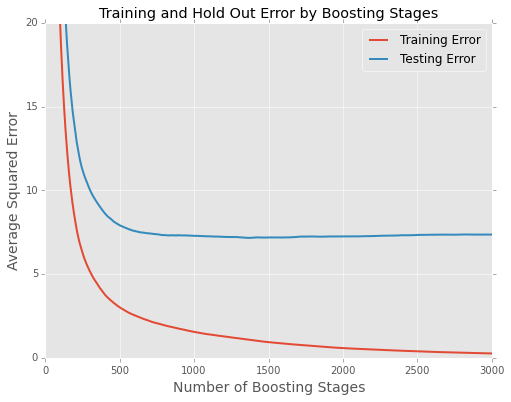

In [926]:
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=1)

model = GradientBoostingRegressor(n_estimators=N_ESTIMATORS, learning_rate=0.01)
model.fit(X_train, y_train)

train_score = np.zeros(N_ESTIMATORS)
for i, y_pred in enumerate(model.staged_predict(X_train)):
    train_score[i] = model.loss_(y_train, y_pred)

test_score = np.zeros(N_ESTIMATORS)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)
    
plt.plot(np.arange(N_ESTIMATORS) + 1, train_score,
        label="Training Error")
plt.plot(np.arange(N_ESTIMATORS) + 1, test_score,
        label="Testing Error")
plt.title("Training and Hold Out Error by Boosting Stages")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)
plt.legend(loc="upper right")
plt.ylim([0, 20])

plt.savefig('plots/training-and-testing-error.png', bbox_inches='tight')

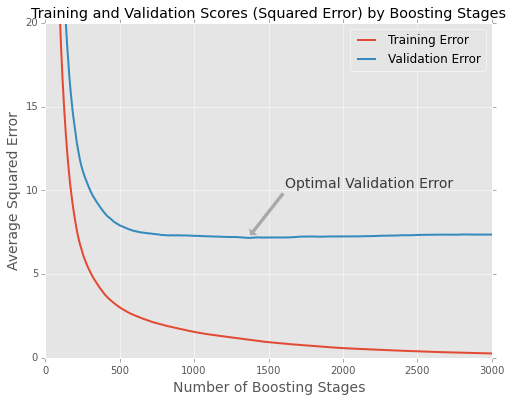

In [927]:
# Estimating the optimal number of boosters using a validation set

optimal_n_trees = np.argmin(test_score)
optimal_score = test_score[optimal_n_trees]

plt.plot(np.arange(N_ESTIMATORS) + 1, train_score,
        label="Training Error")
plt.plot(np.arange(N_ESTIMATORS) + 1, test_score,
        label="Validation Error")

optimal_point = (optimal_n_trees, optimal_score)
plt.annotate('Optimal Validation Error', optimal_point,
              xytext=(optimal_point[0] + 250, optimal_point[1] + 3),
              arrowprops=dict(facecolor="darkgrey", shrink=0.05),
              fontsize=14,
              alpha=0.75
            )

plt.title("Training and Validation Scores (Squared Error) by Boosting Stages")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)
plt.legend(loc="upper right")
plt.ylim([0, 20])

plt.savefig('plots/training-and-testing-error-with-optima.png', bbox_inches='tight')

In [928]:
# Fit a model with optimal values to look at various diagnostic plots

model = GradientBoostingRegressor(n_estimators=optimal_n_trees, learning_rate=0.01)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1362,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [929]:
np.sum(model.feature_importances_)

0.99999999999999989

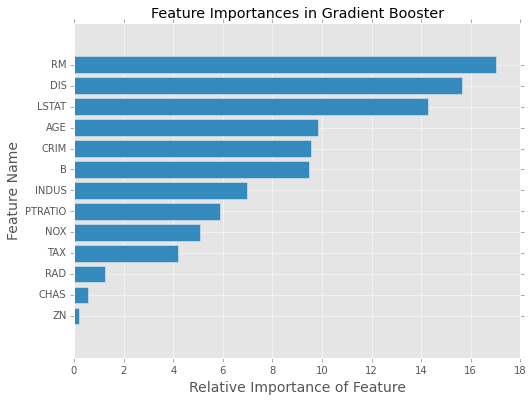

In [930]:
feature_importances = 100*model.feature_importances_ / np.sum(model.feature_importances_)
feature_importances, feature_names, feature_idxs = zip(*sorted(zip(feature_importances, names, range(len(names)))))

width = 0.8

idx = np.arange(len(names))
plt.barh(idx, feature_importances, align='center')
plt.yticks(idx, feature_names)

plt.title("Feature Importances in Gradient Booster")
plt.xlabel('Relative Importance of Feature', fontsize=14)
plt.ylabel('Feature Name', fontsize=14)

plt.savefig('plots/feature-importances.png', bbox_inches='tight')

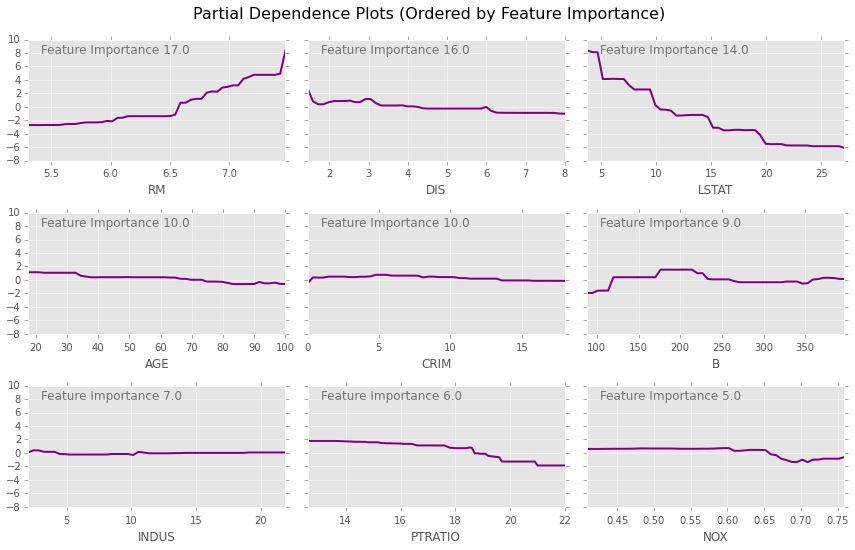

In [931]:
# This kind of sucks
N_COLS = 3
fimportances = list(reversed(feature_importances))
fnames = list(reversed(feature_names))

pd_plots = [partial_dependence(model, target_feature, X=X_train, grid_resolution=50)
            for target_feature in feature_idxs]
pd_plots = list(reversed(zip([pdp[0][0] for pdp in pd_plots], [pdp[1][0] for pdp in pd_plots])))

fig, axes = plt.subplots(nrows=3, ncols=N_COLS, sharey=True, 
                         figsize=(12.0, 8.0))

for i, (y_axis, x_axis) in enumerate(pd_plots[0:(3*N_COLS)]):
    ax = axes[i/N_COLS, i%N_COLS]
    ax.plot(x_axis, y_axis, color="purple")
    ax.set_xlim([np.min(x_axis), np.max(x_axis)])
    text_x_pos = np.min(x_axis) + 0.05*(np.max(x_axis) - np.min(x_axis))
    ax.text(text_x_pos, 8,
            "Feature Importance " + str(round(fimportances[i], )), 
            fontsize=12, alpha=0.5)
    ax.set_xlabel(fnames[i])
    
plt.suptitle("Partial Dependence Plots (Ordered by Feature Importance)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('plots/patial-dependence-plots.png', bbox_inches='tight')

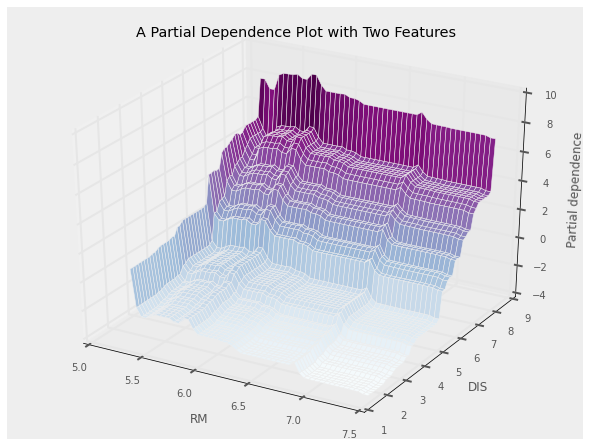

In [932]:
# Two varaibles at once
fidxs = list(reversed(feature_idxs))
pdp, (x_axis, y_axis) = partial_dependence(model, (fidxs[0], fidxs[1]),
                                           X=X_train, grid_resolution=50)

fig = plt.figure()
plt.style.use('bmh')

XX, YY = np.meshgrid(x_axis, y_axis)
Z = pdp.T.reshape(XX.shape)
ax = Axes3D(fig)
ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
ax.view_init(elev=30, azim=300)
ax.set_xlabel(fnames[0])
ax.set_ylabel(fnames[1])
ax.set_zlabel('Partial dependence')
ax.set_title("A Partial Dependence Plot with Two Features")
plt.savefig('plots/patial-dependence-plot-two-features.png', bbox_inches='tight')

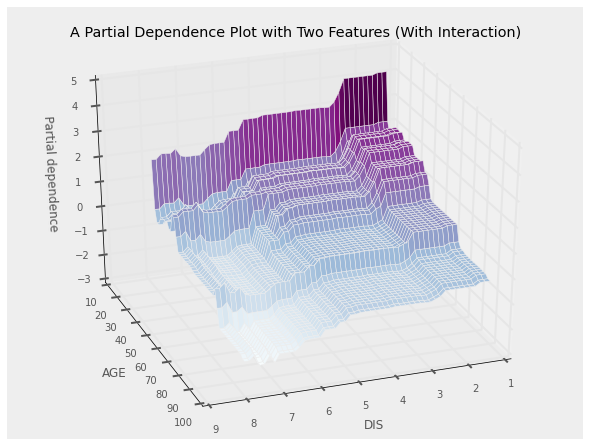

In [933]:
pdp, (x_axis, y_axis) = partial_dependence(model, (fidxs[1], fidxs[3]),
                                           X=X_train, grid_resolution=50)

fig = plt.figure()
plt.style.use('bmh')

XX, YY = np.meshgrid(x_axis, y_axis)
Z = pdp.T.reshape(XX.shape)
ax = Axes3D(fig)
ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
ax.view_init(elev=30, azim=70)
ax.set_xlabel(fnames[1])
ax.set_ylabel(fnames[3])
ax.set_zlabel('Partial dependence')
ax.set_title("A Partial Dependence Plot with Two Features (With Interaction)")
plt.savefig('plots/patial-dependence-plot-two-features-with-interaction.png', bbox_inches='tight')

In [934]:
# Set style back
plt.style.use('ggplot')

In [935]:
# Tuning by cross validation
N_ESTIMATORS = 4000
N_FOLDS = 10

train_scores = np.zeros((N_FOLDS, N_ESTIMATORS))
test_scores = np.zeros((N_FOLDS, N_ESTIMATORS))

for k, (train_idxs, test_idxs) in enumerate(cv.KFold(n=X.shape[0], n_folds=N_FOLDS,
                                            shuffle=True, random_state=1)):
    X_train, y_train = X[train_idxs, :], y[train_idxs]
    X_test, y_test = X[test_idxs, :], y[test_idxs]
    model = GradientBoostingRegressor(n_estimators=N_ESTIMATORS, learning_rate=0.01)
    model.fit(X_train, y_train)
    for i, y_pred in enumerate(model.staged_predict(X_train)):
        train_scores[k, i] = model.loss_(y_train, y_pred)
    for i, y_pred in enumerate(model.staged_predict(X_test)):
        test_scores[k, i] = model.loss_(y_test, y_pred)
        
mean_train_score = np.mean(train_scores, axis=0)
mean_test_score = np.mean(test_scores, axis=0)

optimal_n_trees = np.argmin(mean_test_score)
optimal_score = mean_test_score[optimal_n_trees]
optimal_point = (optimal_n_trees, optimal_score)

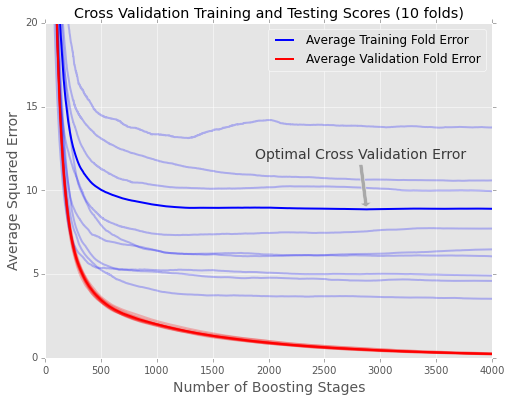

In [936]:
for i in xrange(N_FOLDS):
    plt.plot(np.arange(N_ESTIMATORS) + 1, train_scores[i, :], color='red', alpha=0.25)
    
for i in xrange(N_FOLDS):
    plt.plot(np.arange(N_ESTIMATORS) + 1, test_scores[i, :], color='blue', alpha=0.25)
    
plt.plot(np.arange(N_ESTIMATORS) + 1, mean_test_score, color='blue', linewidth=2,
         label='Average Training Fold Error')
plt.plot(np.arange(N_ESTIMATORS) + 1, mean_train_score, color='red', linewidth=2,
         label='Average Validation Fold Error')

plt.annotate('Optimal Cross Validation Error', optimal_point,
              xytext=(optimal_point[0] - 1000, optimal_point[1] + 3),
              arrowprops=dict(facecolor="darkgrey", shrink=0.05),
              fontsize=14,
              alpha=0.75
            )

plt.title("Cross Validation Training and Testing Scores (10 folds)")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)
plt.legend(loc="upper right")
plt.ylim([0, 20])

plt.savefig('plots/training-and-testing-cv-error.png', bbox_inches='tight')

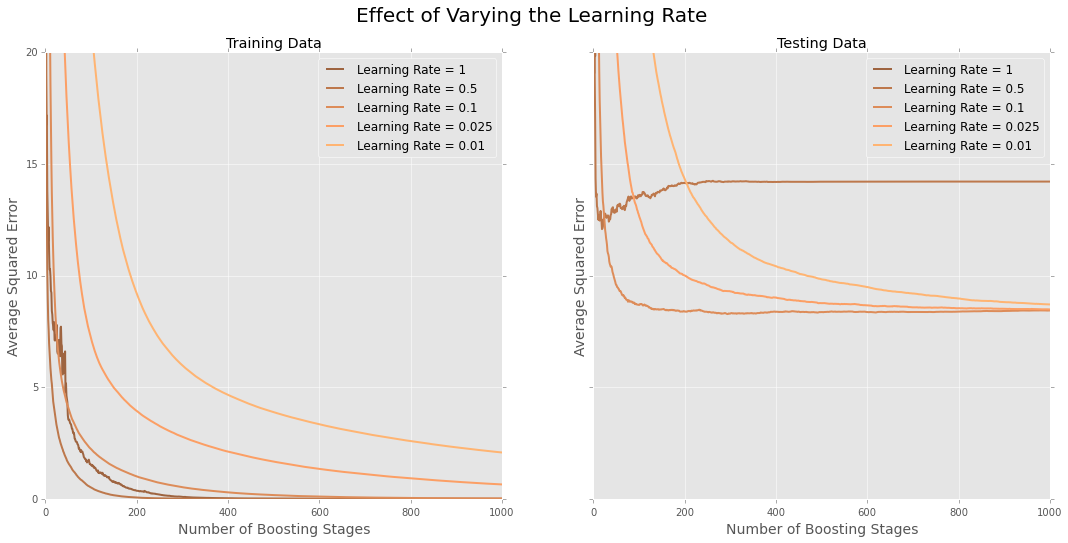

In [937]:
# Varying the learning rate
N_ESTIMATORS = 1000
N_FOLDS = 10

learning_rates = [1, 0.5, 0.1, 0.025, 0.01]
N_LEARNING_RATES = len(learning_rates)

train_scores = np.zeros((N_FOLDS, N_LEARNING_RATES, N_ESTIMATORS))
test_scores = np.zeros((N_FOLDS, N_LEARNING_RATES, N_ESTIMATORS))

for k, (train_idxs, test_idxs) in enumerate(cv.KFold(n=X.shape[0], n_folds=N_FOLDS,
                                            shuffle=True, random_state=1)):
    X_train, y_train = X[train_idxs, :], y[train_idxs]
    X_test, y_test = X[test_idxs, :], y[test_idxs]

    models = [GradientBoostingRegressor(n_estimators=N_ESTIMATORS,
                                        max_depth=3, learning_rate=lr, subsample=0.5,
                                        random_state=154) 
              for lr in learning_rates]
    for model in models:
        model.fit(X_train, y_train)
    
    for i, model in enumerate(models):
        for j, y_pred in enumerate(model.staged_predict(X_train)):
            train_scores[k, i, j] = model.loss_(y_train, y_pred)
        
    for i, model in enumerate(models):
        for j, y_pred in enumerate(model.staged_predict(X_test)):
            test_scores[k, i, j] = model.loss_(y_test, y_pred)

mean_train_scores = np.mean(train_scores, axis=0)
mean_test_scores = np.mean(test_scores, axis=0)
            
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, 
                         figsize=(18.0, 8.0))
        
for i, rate in enumerate(learning_rates):        
    axes[0].plot(np.arange(N_ESTIMATORS) + 1, mean_train_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Learning Rate = " + str(rate))
axes[0].legend(loc="upper right")
axes[0].set_title("Training Data")
axes[0].set_xlabel('Number of Boosting Stages', fontsize=14)
axes[0].set_ylabel('Average Squared Error', fontsize=14)

for i, rate in enumerate(learning_rates):        
    axes[1].plot(np.arange(N_ESTIMATORS) + 1, mean_test_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Learning Rate = " + str(rate))
axes[1].legend(loc="upper right")
axes[1].set_title("Testing Data")
axes[1].set_xlabel('Number of Boosting Stages', fontsize=14)
axes[1].set_ylabel('Average Squared Error', fontsize=14)

plt.ylim([0, 20])
plt.suptitle("Effect of Varying the Learning Rate", fontsize=20)

plt.savefig('plots/varying-learning-rate-error.png', bbox_inches='tight')

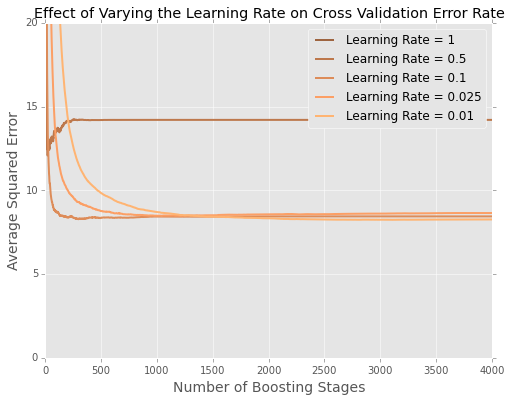

In [946]:
# Varying the learning rate
N_ESTIMATORS = 4000
N_FOLDS = 10

learning_rates = [1, 0.5, 0.1, 0.025, 0.01]
N_LEARNING_RATES = len(learning_rates)

test_scores = np.zeros((N_FOLDS, N_LEARNING_RATES, N_ESTIMATORS))

for k, (train_idxs, test_idxs) in enumerate(cv.KFold(n=X.shape[0], n_folds=N_FOLDS,
                                            shuffle=True, random_state=1)):
    X_train, y_train = X[train_idxs, :], y[train_idxs]
    X_test, y_test = X[test_idxs, :], y[test_idxs]

    models = [GradientBoostingRegressor(n_estimators=N_ESTIMATORS,
                                        max_depth=3, learning_rate=lr, subsample=0.5,
                                        random_state=154) 
              for lr in learning_rates]
    for model in models:
        model.fit(X_train, y_train)
        
    for i, model in enumerate(models):
        for j, y_pred in enumerate(model.staged_predict(X_test)):
            test_scores[k, i, j] = model.loss_(y_test, y_pred)

mean_test_scores = np.mean(test_scores, axis=0)
        
for i, rate in enumerate(learning_rates):        
    plt.plot(np.arange(N_ESTIMATORS) + 1, mean_test_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Learning Rate = " + str(rate))
plt.legend(loc="upper right")
plt.title("Effect of Varying the Learning Rate on Cross Validation Error Rate")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)

plt.ylim([0, 20])
plt.savefig('plots/varying-learning-rate-error-testing.png', bbox_inches='tight')

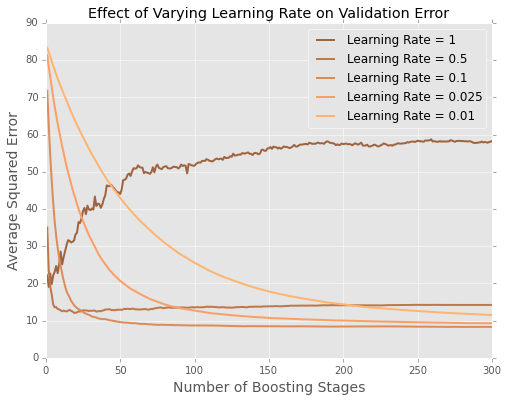

In [948]:
for i, rate in enumerate(learning_rates):        
    plt.plot(np.arange(N_ESTIMATORS) + 1, mean_test_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Learning Rate = " + str(rate))
plt.legend(loc="upper right")
plt.title("Effect of Varying Learning Rate on Validation Error")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)

plt.xlim([0, 300])
plt.savefig('plots/varying-learning-rate-error-testing-zoom-start.png', bbox_inches='tight')

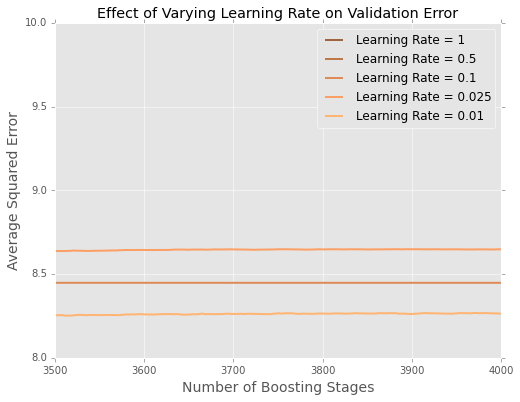

In [949]:
for i, rate in enumerate(learning_rates):        
    plt.plot(np.arange(N_ESTIMATORS) + 1, mean_test_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Learning Rate = " + str(rate))
plt.legend(loc="upper right")
plt.title("Effect of Varying Learning Rate on Validation Error")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)

plt.xlim([3500, 4000])
plt.ylim([8, 10])
plt.savefig('plots/varying-learning-rate-error-testing-zoom-end.png', bbox_inches='tight')

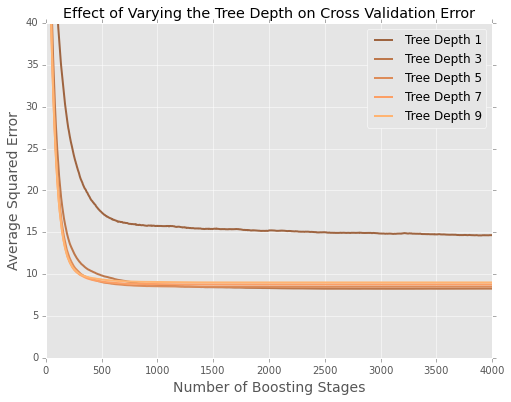

In [941]:
# Varying the tree depth rate
N_ESTIMATORS = 4000
N_FOLDS = 10

tree_depths = [1, 3, 5, 7, 9]
N_TREE_DEPTHS = len(tree_depths)

test_scores = np.zeros((N_FOLDS, N_TREE_DEPTHS, N_ESTIMATORS))

for k, (train_idxs, test_idxs) in enumerate(cv.KFold(n=X.shape[0], n_folds=N_FOLDS,
                                            shuffle=True, random_state=1)):
    X_train, y_train = X[train_idxs, :], y[train_idxs]
    X_test, y_test = X[test_idxs, :], y[test_idxs]

    models = [GradientBoostingRegressor(n_estimators=N_ESTIMATORS,
                                        max_depth=td, learning_rate=0.01, subsample=0.5,
                                        random_state=154)
              for td in tree_depths]
    for model in models:
        model.fit(X_train, y_train)
        
    for i, model in enumerate(models):
        for j, y_pred in enumerate(model.staged_predict(X_test)):
            test_scores[k, i, j] = model.loss_(y_test, y_pred)
        
mean_test_scores = np.mean(test_scores, axis=0)

for i, depth in enumerate(tree_depths):        
    plt.plot(np.arange(N_ESTIMATORS) + 1, mean_test_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Tree Depth " + str(depth))
plt.legend(loc="upper right")
plt.title("Effect of Varying the Tree Depth on Cross Validation Error")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)

plt.ylim([0, 40])
plt.savefig('plots/varying-tree-depth-error.png', bbox_inches='tight')

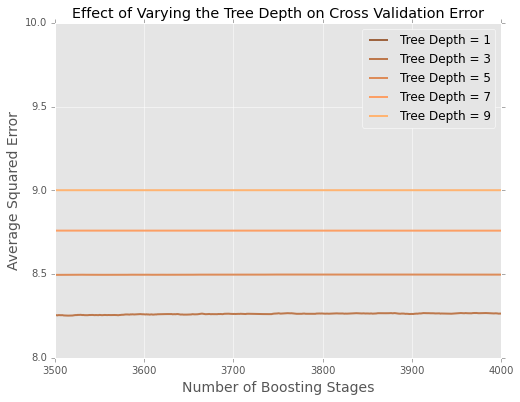

In [942]:
for i, depth in enumerate(tree_depths):        
    plt.plot(np.arange(N_ESTIMATORS) + 1, mean_test_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Tree Depth = " + str(depth))
plt.legend(loc="upper right")
plt.title("Effect of Varying the Tree Depth on Cross Validation Error")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)

plt.xlim([3500, 4000])
plt.ylim([8, 10])
plt.savefig('plots/varying-learning-rate-error-testing-zoom-end.png', bbox_inches='tight')

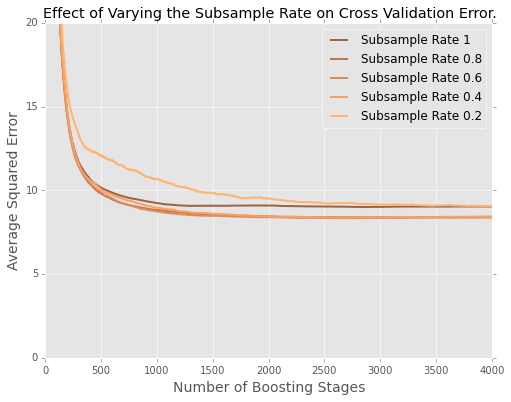

In [943]:
# Varying the subsample rate
N_ESTIMATORS = 4000
N_FOLDS = 10

subsample_rates = [1, 0.8, 0.6, 0.4, 0.2]
N_SUBSAMPLE_RATES = len(subsample_rates)

test_scores = np.zeros((N_FOLDS, N_SUBSAMPLE_RATES, N_ESTIMATORS))

for k, (train_idxs, test_idxs) in enumerate(cv.KFold(n=X.shape[0], n_folds=N_FOLDS,
                                            shuffle=True, random_state=1)):
    X_train, y_train = X[train_idxs, :], y[train_idxs]
    X_test, y_test = X[test_idxs, :], y[test_idxs]

    models = [GradientBoostingRegressor(n_estimators=N_ESTIMATORS,
                                        max_depth=3, learning_rate=0.01, subsample=sr,
                                        random_state=154)
              for sr in subsample_rates]
    for model in models:
        model.fit(X_train, y_train)
        
    for i, model in enumerate(models):
        for j, y_pred in enumerate(model.staged_predict(X_test)):
            test_scores[k, i, j] = model.loss_(y_test, y_pred)
        
mean_test_scores = np.mean(test_scores, axis=0)

for i, rate in enumerate(subsample_rates):        
    plt.plot(np.arange(N_ESTIMATORS) + 1, mean_test_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Subsample Rate " + str(rate))
plt.legend(loc="upper right")
plt.title("Effect of Varying the Subsample Rate on Cross Validation Error.")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)

plt.ylim([0, 20])
plt.savefig('plots/varying-subsample-rate-error.png', bbox_inches='tight')

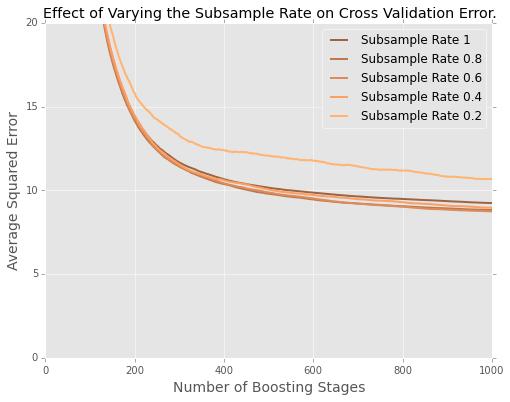

In [944]:
for i, rate in enumerate(subsample_rates):        
    plt.plot(np.arange(N_ESTIMATORS) + 1, mean_test_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Subsample Rate " + str(rate))
plt.legend(loc="upper right")
plt.title("Effect of Varying the Subsample Rate on Cross Validation Error.")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)

plt.ylim([0, 20])
plt.xlim([0, 1000])
plt.savefig('plots/varying-subsample-rate-error-zoom-start.png', bbox_inches='tight')

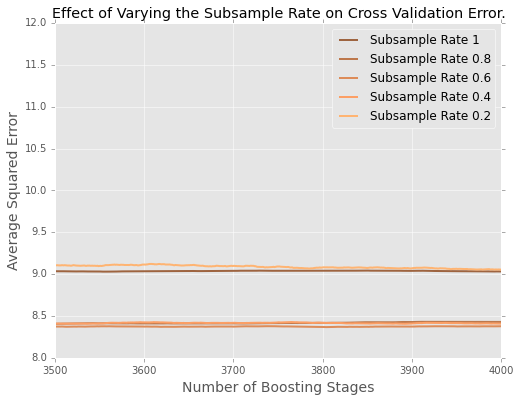

In [945]:
for i, rate in enumerate(subsample_rates):        
    plt.plot(np.arange(N_ESTIMATORS) + 1, mean_test_scores[i, :], 
                 color=plt.cm.copper(float(i) / 10 + 0.5),
                 label="Subsample Rate " + str(rate))
plt.legend(loc="upper right")
plt.title("Effect of Varying the Subsample Rate on Cross Validation Error.")
plt.xlabel('Number of Boosting Stages', fontsize=14)
plt.ylabel('Average Squared Error', fontsize=14)

plt.ylim([8, 12])
plt.xlim([3500, 4000])
plt.savefig('plots/varying-subsample-rate-error-zoom-end.png', bbox_inches='tight')